In [157]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from web import Recommender
reco = Recommender(_id="6252aa13065072f065307c62")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1 round : ECV 24.73%
2 round : ECV 45.14%
3 round : ECV 52.19%
4 round : ECV 54.85%
5 round : ECV 55.84%
6 round : ECV 56.88%
7 round : ECV 57.18%
8 round : ECV 57.2%
9 round : ECV 57.22%
10 round : ECV 57.22%
11 round : ECV 57.22%
12 round : ECV 57.22%
13 round : ECV 57.22%
14 round : ECV 57.22%
15 round : ECV 57.22%
[56.57688775 55.60709048 57.95601921 57.24678539 57.74930086 57.21859606]
Clustering End. ECV 57.95601920551332 data Select


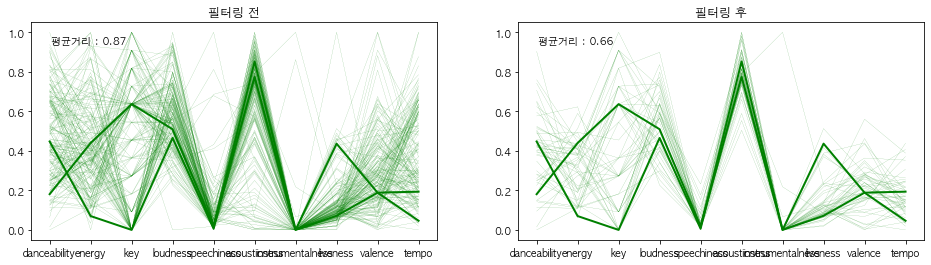

In [158]:
reco.init_setting()
reco.data_preprocessing()
reco.norm_features.head()
reco.reco_kmeans()
reco.visual_filtering()

In [38]:
_norm_features = reco.norm_features.set_index("trackId").copy()
_my_features = reco.spotify.features.copy()
_reco_features = reco.spotify.reco_features.copy()

my_norm_features = _norm_features.loc[_my_features['trackId']]
r_norm_features = _norm_features.loc[_reco_features['trackId']]

In [155]:
def visual_filtering():
    matplotlib.rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(16,4))
    
    _norm_features = reco.norm_features.set_index("trackId").copy()
    _my_features = reco.spotify.features.copy()
    _reco_features = reco.spotify.reco_features.copy()
    
    feature_cols = _norm_features.columns.values

    my_norm_features = _norm_features.loc[_my_features['trackId']]
    r_norm_features = _norm_features.loc[_reco_features['trackId']]
    
    euc_check = euc(my_norm_features.values, r_norm_features.values).mean()
    # First Plot
    ax_1 = plt.subplot(1,2,1)
    ax_1.plot(feature_cols,r_norm_features.values.T, color='g', linewidth=0.1)
    ax_1.plot(feature_cols,my_norm_features.values.T, color='g', linewidth=2)
    ax_1.text(
        0.05,
        0.9,
        "평균거리 : {}".format(round(euc_check * 100) / 100),
        ha='left', 
        transform=ax_1.transAxes
    )
    ax_1.set_title("필터링 전")
    
    # Second Plot
    r_norm_features_2 = _norm_features.loc[reco.reco_musics['trackId']]
    euc_check = euc(my_norm_features.values, r_norm_features_2.values).mean()
    
    ax_2 = plt.subplot(1,2,2)
    ax_2.plot(feature_cols,r_norm_features_2.values.T, color='g', linewidth=0.1)
    ax_2.plot(feature_cols,my_norm_features.values.T, color='g', linewidth=2)
    ax_2.text(
        0.05,
        0.9,
        "평균거리 : {}".format(round(euc_check * 100) / 100),
        ha='left', 
        transform=ax_2.transAxes
    )
    ax_2.set_title("필터링 후")
    
    now_time = dt.datetime.now().strftime("%Y%m%dT%H%M%Sms%f")
    plt.savefig("./visual_images/visual_{}.png".format(now_time))

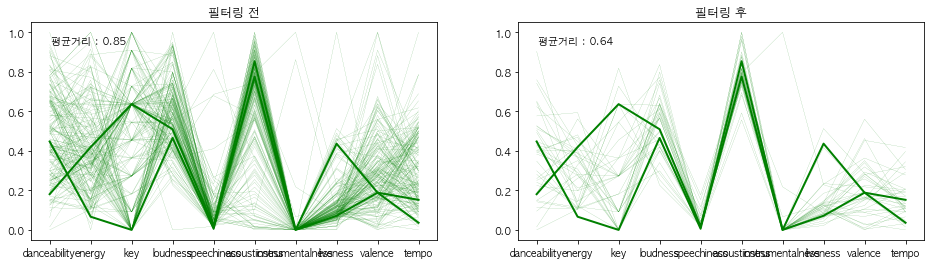

In [156]:
visual_filtering()

In [136]:
dt.datetime.now().strftime("%Y%m%dT%H%M%Sms%f")

'20220411T221346ms596038'